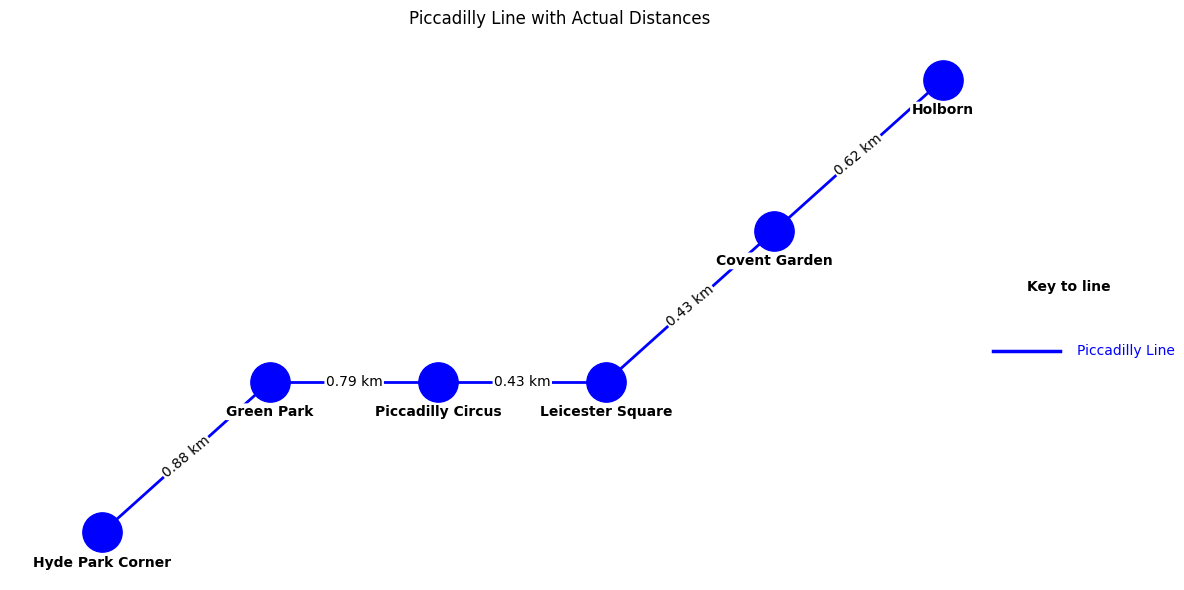

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import requests

# Function to get distance between two locations using GraphHopper
def get_distance(from_place, to_place, api_key):
    url = f"https://graphhopper.com/api/1/route?point={from_place}&point={to_place}&vehicle=foot&locale=en&key={api_key}"
    try:
        response = requests.get(url)
        response.raise_for_status()
        data = response.json()
        if 'paths' in data and len(data['paths']) > 0:
            distance = data['paths'][0]['distance'] / 1000  # Convert meters to kilometers
            return round(distance, 2)  # Round to two decimal places
    except requests.exceptions.RequestException as e:
        print(f"Request error: {e}")
    except KeyError:
        print(f"Unexpected API response format: {response.json()}")
    return None

# Define stations and their positions (latitude, longitude)
stations = {
    'Hyde Park Corner': (51.5025, -0.1527),
    'Green Park': (51.5067, -0.1428),
    'Piccadilly Circus': (51.5101, -0.1337),  
    'Leicester Square': (51.5115, -0.1280),
    'Covent Garden': (51.5133, -0.1240),
    'Holborn': (51.5171, -0.1195)
}

# Define connections (edges)
connections = [
    ('Hyde Park Corner', 'Green Park'),
    ('Green Park', 'Piccadilly Circus'),
    ('Piccadilly Circus', 'Leicester Square'),
    ('Leicester Square', 'Covent Garden'),
    ('Covent Garden', 'Holborn')
]

api_key = '408e5b3d-bef9-4b38-88c4-5c769156c701'  # GraphHopper API Key

# Calculate distances and store them
distances = {}
for u, v in connections:
    distance = get_distance(f"{stations[u][0]},{stations[u][1]}", f"{stations[v][0]},{stations[v][1]}", api_key)
    if distance is not None:
        distances[(u, v)] = distance
    else:
        print(f"Failed to fetch distance for: {u} -> {v}")

# Create the network graph
def create_piccadilly_segment():
    # Create a new directed graph
    G = nx.Graph()
    
    # Define stations and their positions 
    stations_layout = {
        'Hyde Park Corner': (0, 0),
        'Green Park': (1, 0.5),
        'Piccadilly Circus': (2, 0.5),
        'Leicester Square': (3, 0.5),
        'Covent Garden': (4, 1),
        'Holborn': (5, 1.5)
    }
    
    # Add nodes (stations)
    for station, pos in stations_layout.items():
        G.add_node(station, pos=pos)
    
    connections_with_distances = [
        (u, v, distances.get((u, v), "N/A"))
        for u, v in connections
    ]
    
    # Add edges (connections)
    for u, v, distance in connections_with_distances:
        if distance != "N/A":
            G.add_edge(u, v, weight=distance)
        else:
            print(f"Skipping edge: {u} -> {v} due to missing data")
    
    # Create the plot
    plt.figure(figsize=(12, 6))
    
    # Get positions of the nodes
    pos = nx.get_node_attributes(G, 'pos')
    
    # Draw edges
    nx.draw_networkx_edges(G, pos, edge_color='blue', width=2)
    
    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_color='blue', node_size=800)
    
    # Add station names below each node
    for node, (x, y) in pos.items():
        plt.text(
            x, y - 0.1, node, ha='center', va='center', fontsize=10, fontweight="bold",
            color="black", bbox=dict(facecolor="white", edgecolor="none", boxstyle="round,pad=0.1")
        )
    
    # Add edge labels (distances)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    formatted_labels = {k: f"{v} km" for k, v in edge_labels.items() if v != "N/A"}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=formatted_labels, font_size=10,
                                bbox=dict(facecolor="white", edgecolor="none", boxstyle="round,pad=0.1"))
    
    # Add key/legend
    legend_x, legend_y = 5.5, 0.8
    plt.text(legend_x, legend_y, "Key to line", fontsize=10, fontweight="bold",
             bbox=dict(facecolor="white", edgecolor="none", boxstyle="round,pad=0.3"))
    plt.plot([legend_x - 0.2, legend_x + 0.2], [legend_y - 0.2, legend_y - 0.2], color='blue', linewidth=2.5)
    plt.text(legend_x + 0.3, legend_y - 0.2, "Piccadilly Line", fontsize=10, va='center', color='blue')
    
    plt.title("Piccadilly Line with Real-World Distances")
    plt.axis("off")
    
    return plt

plt = create_piccadilly_segment()
plt.tight_layout()
plt.show()

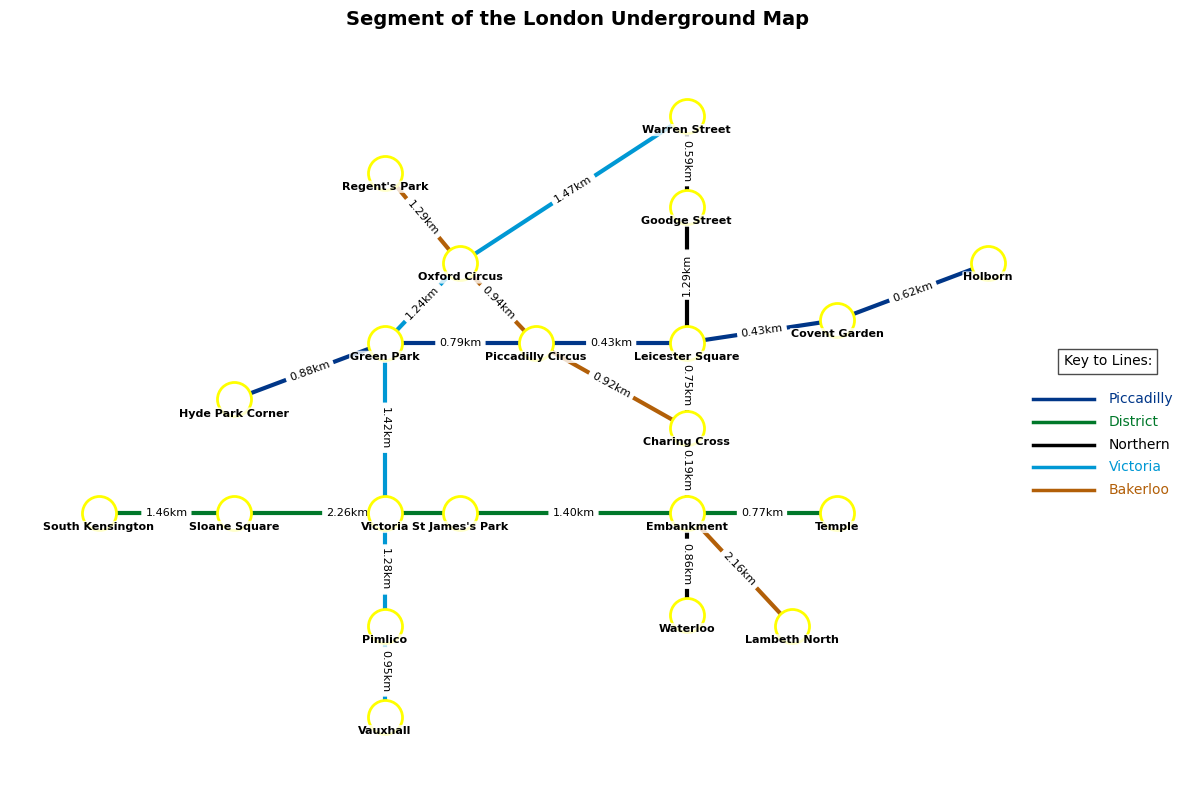

In [4]:

import networkx as nx
import matplotlib.pyplot as plt
import requests

# Function to get distance between two locations using GraphHopper
def get_distance(from_place, to_place, api_key):
    url = f"https://graphhopper.com/api/1/route?point={from_place}&point={to_place}&vehicle=foot&locale=en&key={api_key}"
    try:
        response = requests.get(url)
        response.raise_for_status()
        data = response.json()
        if 'paths' in data and len(data['paths']) > 0:
            distance = data['paths'][0]['distance'] / 1000  # Convert meters to kilometers
            return round(distance,2)  # Round to two decimal places
    except requests.exceptions.RequestException as e:
        print(f"Request error: {e}")
    except KeyError:
        print(f"Unexpected API response format: {response.json()}")
    return None

# Define stations and their positions (latitude, longitude)
stations = {
    'Hyde Park Corner': (51.5025, -0.1527),
    'Green Park': (51.5067, -0.1428),
    'Piccadilly Circus': (51.5101, -0.1337),
    'Leicester Square': (51.5115, -0.1280),
    'Covent Garden': (51.5133, -0.1240),
    'Holborn': (51.5171, -0.1195),
    'Victoria': (51.4966, -0.1443),
    'Oxford Circus': (51.5154, -0.1419),
    'Warren Street': (51.5247, -0.1384),
    'Pimlico': (51.4892, -0.1334),
    'Charing Cross': (51.5070, -0.1244),
    'Vauxhall': (51.4856, -0.1231),
    'Goodge Street': (51.5207, -0.1342),
    'Embankment': (51.5074, -0.1223),
    'Temple': (51.5112, -0.1140),
    'Waterloo': (51.5036, -0.1143),
    'St James\'s Park': (51.4994, -0.1337),
    'Sloane Square': (51.4926, -0.1569),
    'South Kensington': (51.4943, -0.1748),
    'Regent\'s Park': (51.5231, -0.1465),
    'Lambeth North': (51.4951, -0.1101)
}

# Define corrected connections (edges)
connections = [
    ('Hyde Park Corner', 'Green Park'),
    ('Green Park', 'Piccadilly Circus'),
    ('Green Park', 'Victoria'),
    ('Green Park', 'Oxford Circus'),
    ('Oxford Circus', 'Warren Street'),
    ('Piccadilly Circus', 'Leicester Square'),
    ('Leicester Square', 'Covent Garden'),
    ('Leicester Square', 'Charing Cross'),
    ('Goodge Street', 'Warren Street'),
    ('Goodge Street', 'Leicester Square'),
    ('Covent Garden', 'Holborn'),
    ('Victoria', 'Pimlico'),
    ('Pimlico', 'Vauxhall'),
    ('Charing Cross', 'Embankment'),
    ('Embankment', 'Waterloo'),
    ('Embankment', 'Temple'),
    ('Embankment', 'St James\'s Park'),
    ('St James\'s Park', 'Sloane Square'),
    ('Sloane Square', 'South Kensington'),
    ('Victoria', 'South Kensington'),
    ('Regent\'s Park', 'Oxford Circus'),
    ('Oxford Circus', 'Piccadilly Circus'),
    ('Piccadilly Circus', 'Charing Cross'),
    ('Charing Cross', 'Embankment'),
    ('Embankment', 'Lambeth North')
]

api_key = '9f3cc7cc-ec4a-4215-b7cf-f899113a43d3'  # GraphHopper API Key


distances = {}
for u, v in connections:
    distance = get_distance(f"{stations[u][0]},{stations[u][1]}", f"{stations[v][0]},{stations[v][1]}", api_key)
    if distance is not None:
        distances[(u, v)] = distance
    else:
        print(f"Failed to fetch distance for: {u} -> {v}")

def create_graph():
    # Create a new undirected graph
    G = nx.Graph()
    
    # Define stations and their positions (x, y coordinates for visualization)
    stations_layout = {
        'Hyde Park Corner': (0, 0),
        'Green Park': (1, 0.5),
        'Piccadilly Circus': (2, 0.5),
        'Leicester Square': (3, 0.5),
        'Charing Cross': (3, -0.25),
        'Covent Garden': (4, 0.7),
        'Holborn': (5, 1.2),
        'Victoria': (1, -1),
        'Oxford Circus': (1.5, 1.2),
        'Warren Street': (3, 2.5),
        'Pimlico': (1, -2),
        'Vauxhall': (1, -2.8),
        'Goodge Street': (3, 1.7),
        'Embankment': (3, -1),
        'Temple': (4, -1),
        'Waterloo': (3, -1.9),
        'St James\'s Park': (1.5, -1),
        'Sloane Square': (0, -1),
        'South Kensington': (-0.9, -1),
        'Regent\'s Park': (1, 2),
        'Lambeth North': (3.7, -2)
    }
    
    # Define connections by line
    line_connections = {
        'Piccadilly': [
            ('Hyde Park Corner', 'Green Park'),
            ('Green Park', 'Piccadilly Circus'),
            ('Piccadilly Circus', 'Leicester Square'),
            ('Leicester Square', 'Covent Garden'),
            ('Covent Garden', 'Holborn')
        ],
        'District': [
            ('South Kensington', 'Sloane Square'),
            ('Sloane Square', 'St James\'s Park'),
            ('St James\'s Park', 'Embankment'),
            ('Embankment', 'Temple')
        ],
        'Northern': [
            ('Warren Street', 'Goodge Street'),
            ('Goodge Street', 'Leicester Square'),
            ('Leicester Square', 'Charing Cross'),
            ('Charing Cross', 'Embankment'),
            ('Embankment', 'Waterloo')
        ],
        'Victoria': [
            ('Warren Street', 'Oxford Circus'),
            ('Oxford Circus', 'Green Park'),
            ('Green Park', 'Victoria'),
            ('Victoria', 'Pimlico'),
            ('Pimlico', 'Vauxhall')
        ],
        'Bakerloo': [
            ('Regent\'s Park', 'Oxford Circus'),
            ('Oxford Circus', 'Piccadilly Circus'),
            ('Piccadilly Circus', 'Charing Cross'),
            ('Charing Cross', 'Embankment'),
            ('Embankment', 'Lambeth North')
        ]
    }
    
    # Define line colors
    line_colors = {
        'Piccadilly': '#003688',  # Dark Blue
        'District': '#00782A',    # Green
        'Northern': '#000000',    # Black
        'Victoria': '#0098D4',     # Light Blue
        'Bakerloo': '#B25F08'      # Brown 
    }
    
    # Create the plot
    plt.figure(figsize=(12, 8))
    
    # Add nodes
    for station in stations_layout:
        G.add_node(station, pos=stations_layout[station])
    
    # Get positions for all nodes
    pos = nx.get_node_attributes(G, 'pos')
    
    # Draw edges for each line with different colors
    for line_name, connections in line_connections.items():
        edge_list = []
        for u, v in connections:
            G.add_edge(u, v)
            edge_list.append((u, v))
            
        nx.draw_networkx_edges(G, pos,
                            edgelist=edge_list,
                            edge_color=line_colors[line_name],
                            width=3)
    
    # Draw all nodes
    nx.draw_networkx_nodes(G, pos,
                        node_color='white',
                        node_size=600,
                        edgecolors='yellow',
                        linewidths=2)
    
    # Add station names
    for station, (x, y) in stations_layout.items():
        plt.text(
        x, y - 0.125, station,  
        ha='center', va='center',
        fontsize=8,             
        fontweight='bold',       
        color='black',           
        bbox=dict(
            facecolor='white',   
            edgecolor='none',    
            alpha=0.8,           
            boxstyle="round,pad=0.1"  
        )
    )
    
    # Add distances
    edge_labels = {}
    for (u, v) in G.edges():
        if (u, v) in distances:
            edge_labels[(u, v)] = f"{distances[(u, v)]:.2f}km"
        elif (v, u) in distances:
            edge_labels[(u, v)] = f"{distances[(v, u)]:.2f}km"
        else:
            edge_labels[(u, v)] = "N/A"
    
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)
    
    # Add legend with colored lines
    legend_x = 5.5
    legend_y = 0
    plt.text(legend_x, legend_y + 0.3, "Key to Lines:", fontsize=10,
            bbox=dict(facecolor="white", edgecolor="black", alpha=0.7))
    
    for i, (line_name, color) in enumerate(line_colors.items()):
        plt.plot([legend_x - 0.2, legend_x + 0.2],
                [legend_y - i * 0.2, legend_y - i * 0.2],
                color=color, linewidth=2.5)
        plt.text(legend_x + 0.3, legend_y - i * 0.2, line_name,
                color=color, fontsize=10, va='center')
    
    # Set title and remove axes
    plt.title('Segment of the London Underground Map', pad=20, fontsize=14, fontweight='bold')
    plt.axis('off')
    
    return plt

# Create and show the plot
plt = create_graph()
plt.tight_layout()
plt.show()



In [15]:
import numpy as np


def calculate_network_statistics(distances):
    # Extracting the distances from the dictionary into a list
    distance_values = list(distances.values())
    
    # Calculate the total length of the network
    total_length = sum(distance_values)
    
    # Calculate the average distance between stations
    average_distance = np.mean(distance_values)
    
    # Calculate the standard deviation of the distances
    std_deviation = np.std(distance_values)
    
    return total_length, average_distance, std_deviation

# Call the function to calculate the statistics
total_length, average_distance, std_deviation = calculate_network_statistics(distances)


print(f"Total length of the transport network: {total_length:.2f} km")
print(f"Average distance between stations: {average_distance:.2f} km")
print(f"Standard deviation of the distances: {std_deviation:.2f} km")



Total length of the transport network: 27.11 km
Average distance between stations: 1.13 km
Standard deviation of the distances: 0.59 km
